In [1]:
import numpy as np
import pickle
import os

In [2]:
benchmark_ising_path = os.path.join(
    os.getcwd(), "_graphs/benchmarks/opts/cuts_ising_125spin.pkl")

original_solutions = np.array([110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0])

In [3]:
def show_graph_results(path):
    print(f"The current path is {path}")
    # if "opts" not in path:
    #     print("The path contains does not contain 'opts'. This folder should not contain solutions.")
    #     return

    # Open the file for reading in binary mode
    with open(path, 'rb') as file:
        # Call the load method to deserialize the object from the file
        solutions = pickle.load(file)
        # print(f"The path contains {len(solutions)} graph solutions")
        # print(f"The graph solutions are the following: {solutions}")
        # first_graph = graphs[0]
        # print(f"The first graph is composed of {len(first_graph)} vertices.")
        return solutions

In [9]:
ER20_path = os.path.join(
    os.getcwd(), "results/ownER20/benchmark/results_ising_125spin_graphs.pkl")

In [10]:
solutions = show_graph_results(ER20_path)
er_20 = list(solutions["cut"])
er20_mean = list(solutions["mean cut"])
print(er20_mean)

The current path is c:\Users\chaum\Desktop\DATAAI\Internship\eco-dqn\results/ownER20/benchmark/results_ising_125spin_graphs.pkl
[107.0, 108.28, 104.36, 110.08, 107.44, 107.84, 107.48, 106.44, 106.6, 108.04]


In [11]:
ER40_path = os.path.join(
    os.getcwd(), "results/eco/ER40/benchmark/results_ising_125spin_graphs.pkl")

In [13]:
solutions = show_graph_results(ER40_path)
er_40 = list(solutions["cut"])
er40_mean = list(solutions["mean cut"])
print(er40_mean)

The current path is c:\Users\chaum\Desktop\DATAAI\Internship\eco-dqn\results/eco/ER40/benchmark/results_ising_125spin_graphs.pkl
[107.44, 109.44, 105.12, 110.56, 108.92, 108.52, 108.88, 106.92, 107.96, 108.92]


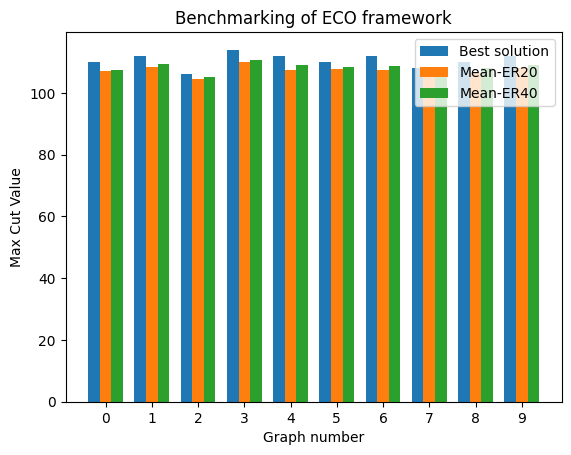

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(10)

# Plot the bars
rects1 = ax.bar(x - width, original_solutions, width, label='Best solution')
rects2 = ax.bar(x, er20_mean, width, label='Mean-ER20')
rects3 = ax.bar(x + width, er40_mean, width, label='Mean-ER40')

# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max Cut Value')
ax.set_title('Benchmarking of ECO framework')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()
